In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline

In [37]:
'''
Training from 2016-01-01 00:00:00 to 2016-12-31 23:00:00,
and predicting from 2017-01-01 00:00:00 to 2018-12-31 23:00:00
'''

'\nTraining from 2016-01-01 00:00:00 to 2016-12-31 23:00:00,\nand predicting from 2017-01-01 00:00:00 to 2018-12-31 23:00:00\n'

In [9]:
'''Function to distribution plot'''
def distplot(variable, color):
    #global ax
    fig,ax = plt.subplots(1,1,figsize=(18,10))
    font_size = 16
    title_size = 20
    #plt.rcParams['figure.figsize'] = (18, 10)
    ax = sns.distplot(variable, color = color)
    ax.set_xlabel('%s' %variable.name, fontsize = font_size)
    ax.set_ylabel('Count ', fontsize = font_size)
    ax.set_xticks(fontsize = font_size)
    ax.set_yticks(fontsize = font_size)
    ax.set_title(' Distribution of '+'%s' %variable.name, fontsize = title_size)
    #plt.show()

In [4]:
data_dir = '/home/luoyuhao/Datasets/kaggle/energy'
train = pd.read_csv(data_dir + '/train.csv')
# Saving some memory
d_types = {'building_id': np.int16,
          'meter': np.int8}

for feature in d_types:
    train[feature] = train[feature].astype(d_types[feature])
     
train["timestamp"] = pd.to_datetime(train["timestamp"])
gc.collect();

In [ ]:
## transform
#train['meter_reading'] = np.log1p(train['meter_reading'])

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

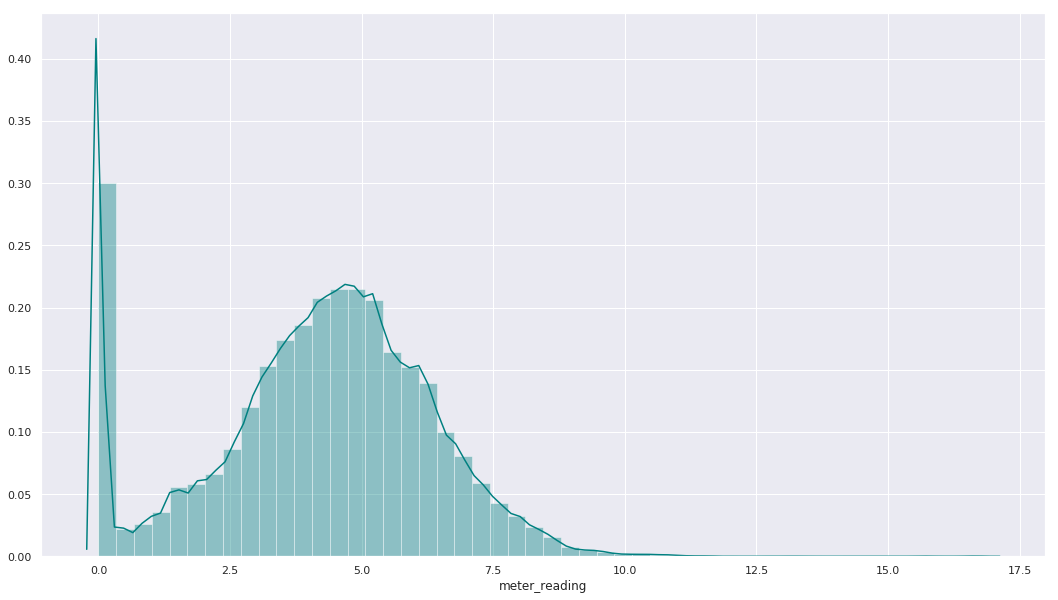

In [10]:
distplot(train['meter_reading'],'teal')

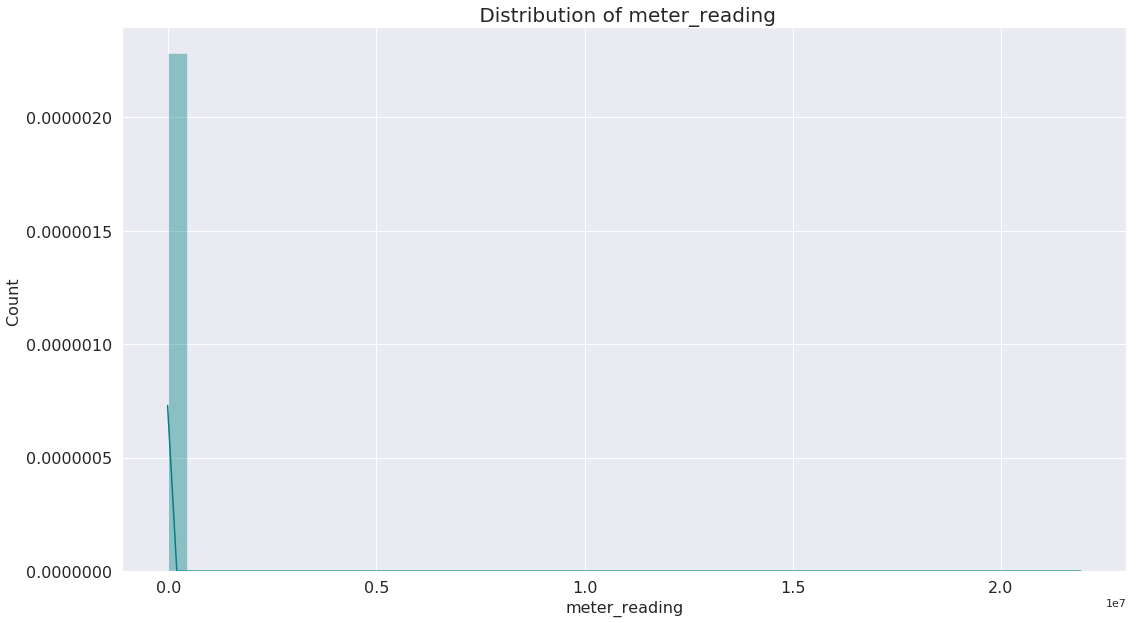

In [6]:
distplot(train[train['meter_reading']!=1099]['meter_reading'],'teal')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

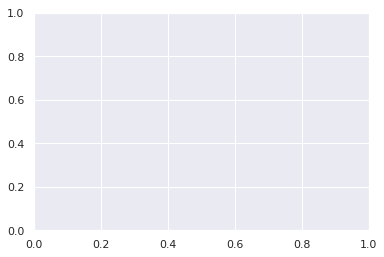

In [7]:
nrof_buildings = len(train['building_id'].unique())
building_mean_H = np.zeros(nrof_buildings)
building_mean_D = np.zeros(nrof_buildings)
for i in (train['building_id'].unique()):
    building_mean_H[i] = train[train['building_id'] == i][['timestamp','meter_reading']].set_index('timestamp')\
    .resample('H').mean()['meter_reading'].max()
    building_mean_D[i] = train[train['building_id'] == i][['timestamp','meter_reading']].set_index('timestamp')\
    .resample('D').mean()['meter_reading'].max()


In [35]:
sort_building_max = np.sort(building_mean_H)
print('hour_mean_max',sort_building_max[-20:])

hour_mean_max [   16212.5           17965.225         18705.8           25495.6
    26319.2           28271.            30268.            32155.525
    35851.80333333    37311.10365       46654.56666667    49376.7
    64702.9435        87142.5          122539.66666667   123984.1
   143190.           160187.           440293.975      10952735.453     ]


In [34]:
print('building id:',np.argsort(building_mean_H)[-20:])

building id: [ 934  955 1200  973  927  903  904  961 1159 1148 1168  879 1197   60
 1088  954  993 1021  778 1099]


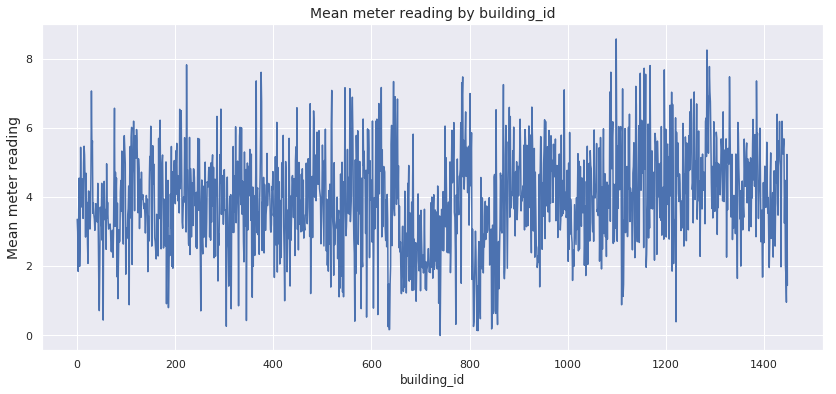

In [7]:

fig, axes = plt.subplots(1,1,figsize=(14, 6))
train.groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Mean meter reading by building_id', fontsize=14);
axes.set_ylabel('Mean meter reading', fontsize=14);

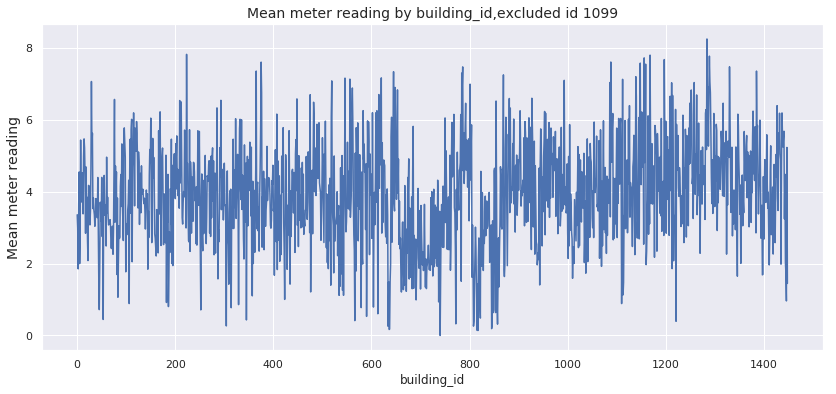

In [8]:
## excluded building 1099
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train[train['building_id']!=1099].groupby('building_id')['meter_reading'].mean().plot();
axes.set_title('Mean meter reading by building_id,excluded id 1099', fontsize=14);
axes.set_ylabel('Mean meter reading', fontsize=14);

Text(0,0.5,'Mean meter reading')

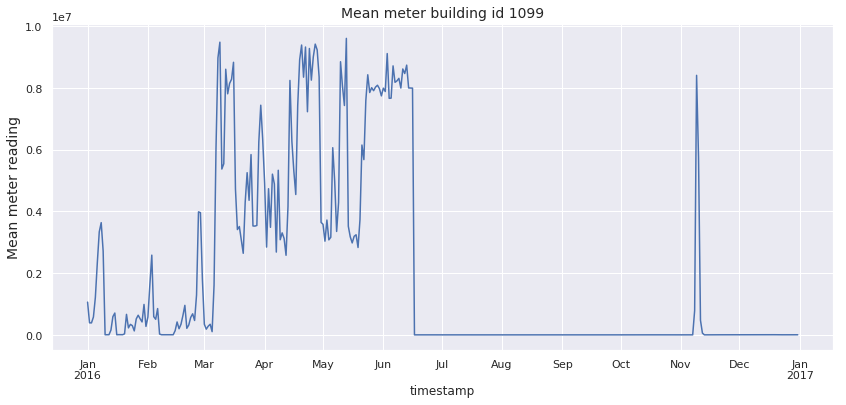

In [48]:
## building 1099
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train[ train['building_id']==1099 ].set_index('timestamp').resample('D').mean()['meter_reading'].plot()
axes.set_title('Mean meter building id 1099', fontsize=14)
axes.set_ylabel('Mean meter reading', fontsize=14)

Text(0,0.5,'Mean meter reading')

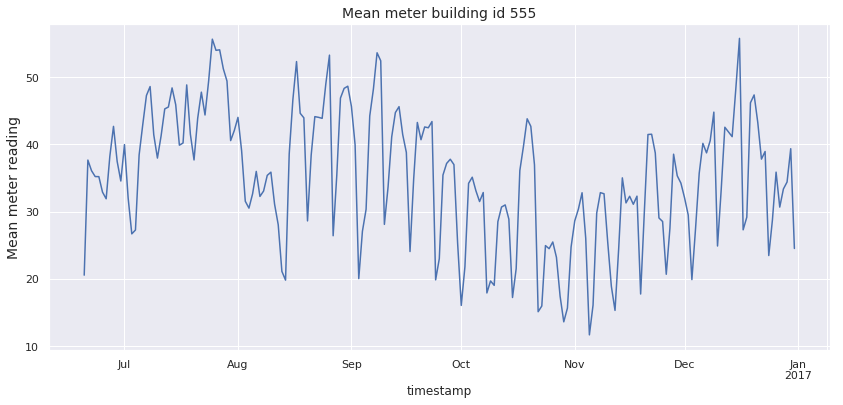

In [49]:
## building 555
fig, axes = plt.subplots(1,1,figsize=(14, 6))
train[ train['building_id']==555 ].set_index('timestamp').\
resample('D').mean()['meter_reading'].plot()
axes.set_title('Mean meter building id 555', fontsize=14)
axes.set_ylabel('Mean meter reading', fontsize=14)

In [50]:
train.groupby('floor_count')['meter_reading'].transform('mean').value_counts().index

KeyError: 'floor_count'

##### data_dir = '/home/luoyuhao/Datasets/kaggle/energy'
building = pd.read_csv(data_dir + '/building_metadata.csv')
#weather_train = pd.read_csv(data_dir + '/weather_train.csv')
#weather_test = pd.read_csv(data_dir + '/weather_test.csv')
#train = pd.read_csv(data_dir + '/train.csv')
#test = pd.read_csv(data_dir + '/test.csv')

In [39]:
# Saving some memory
d_types = {'building_id': np.int16,
          'site_id': np.int8,
          'primary_use': 'category',
          'square_feet': np.int32,
          'year_built': np.float16,
          'floor_count': np.float16}

for feature in d_types:
    building[feature] = building[feature].astype(d_types[feature])
    #test[feature] = test[feature].astype(d_types[feature])
    
#train["timestamp"] = pd.to_datetime(train["timestamp"])
#test["timestamp"] = pd.to_datetime(test["timestamp"])
#gc.collect();

In [40]:
display(building.head())
display(building.describe())

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,inf,3.740234
std,5.003432,418.434583,110769.950997,31.062500,3.333984
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [45]:
print(building.count()/len(building))

site_id        1.000000
building_id    1.000000
primary_use    1.000000
square_feet    1.000000
year_built     0.465839
floor_count    0.244997
dtype: float64


In [47]:
print('year_built',np.sum(building['year_built'].isna()),'empty')
print('floor_count',np.sum(building['floor_count'].isna()),'empty')

year_built 774 empty
floor_count 1094 empty


In [5]:
## Analyse feature 

Text(0.5,1,'number of building distribution')

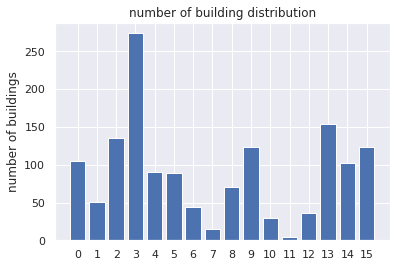

In [17]:
## site_id
fig,ax = plt.subplots(1,1)
build_stic = building['site_id'].value_counts().sort_index()
#display(build_stic.head())
ind = np.arange(len(build_stic.index))
ax.bar(ind,build_stic)
ax.set_ylabel('number of buildings')
ax.set_xticks(ind)
ax.set_xticklabels(build_stic.index, rotation=0)
ax.set_title("number of building distribution")

In [18]:
display(build_stic.describe())

count     16.000000
mean      90.562500
std       66.361604
min        5.000000
25%       42.000000
50%       90.000000
75%      124.000000
max      274.000000
Name: site_id, dtype: float64

Text(0.5,1,'number of building distribution')

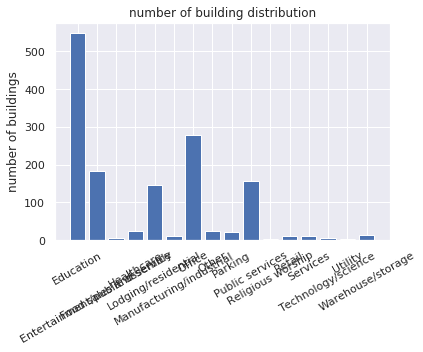

In [21]:
## primary_use
fig,ax = plt.subplots(1,1)
primary_use_stic = building['primary_use'].value_counts().sort_index()
#display(build_stic.head())
ind = np.arange(len(primary_use_stic.index))
ax.bar(ind,primary_use_stic，)
ax.set_ylabel('number of buildings')
ax.set_xticks(ind)
ax.set_xticklabels(primary_use_stic.index, rotation=30)
ax.set_title("number of building distribution")

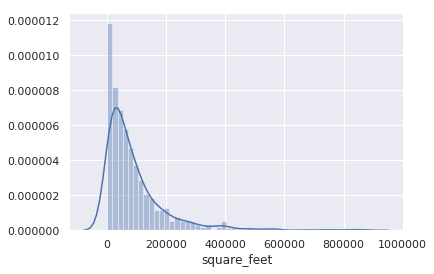

In [23]:
#square_feet
sns.distplot(building['square_feet'])

In [26]:
display(building['square_feet'].describe())

count      1449.000000
mean      92111.776398
std      110769.950997
min         283.000000
25%       23012.000000
50%       57673.000000
75%      115676.000000
max      875000.000000
Name: square_feet, dtype: float64

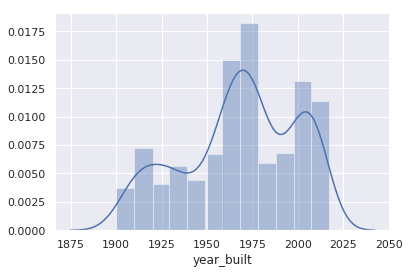

In [9]:
## year_build
## 含有空值，1449-675=774 do not record
sns.distplot(building['year_built'].dropna())

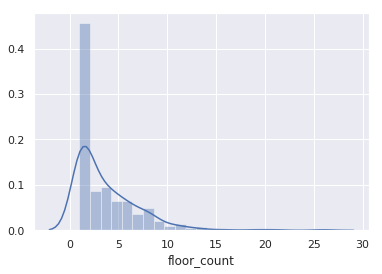

In [8]:
## floor_count 1499-355=1044 do not record
sns.distplot(building['floor_count'].dropna())

In [18]:
weather_train = pd.read_csv(data_dir + '/weather_train.csv')
weather_train['timestamp'] = pd.to_datetime(weather_train["timestamp"])
# Saving some memory
d_types = {
          'site_id': np.int8,
          'air_temperature': np.float32,
          'cloud_coverage': np.float16,
          'dew_temperature': np.float32,
          'precip_depth_1_hr': np.float16,
          'sea_level_pressure': np.float32,
          'wind_direction': np.float16,
          'wind_speed': np.float32}

for feature in d_types:
    weather_train[feature] = weather_train[feature].astype(d_types[feature])
    #test[feature] = test[feature].astype(d_types[feature])


In [19]:
display(weather_train.describe())
display(weather_train.head())

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.0,139660.000000,89484.0,129155.000000,133505.0,139469.000000
mean,7.478977,14.418107,NaN,7.350158,NaN,1016.158081,NaN,3.560527
std,4.604744,10.626595,0.0,9.790235,NaN,7.629684,NaN,2.335874
min,0.000000,-28.900000,0.0,-35.000000,-1.0,968.200012,0.0,0.000000
25%,3.000000,7.200000,0.0,0.600000,0.0,1011.799988,80.0,2.100000
50%,7.000000,15.000000,2.0,8.300000,0.0,1016.400024,190.0,3.100000
75%,11.000000,22.200001,4.0,14.400000,0.0,1020.799988,280.0,5.000000
max,15.000000,47.200001,9.0,26.100000,343.0,1045.500000,360.0,19.000000


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.0,NaN,1019.700012,0.0,0.0
1,0,2016-01-01 01:00:00,24.400000,NaN,21.1,-1.0,1020.200012,70.0,1.5
2,0,2016-01-01 02:00:00,22.799999,2.0,21.1,0.0,1020.200012,0.0,0.0
3,0,2016-01-01 03:00:00,21.100000,2.0,20.6,0.0,1020.099976,0.0,0.0
4,0,2016-01-01 04:00:00,20.000000,2.0,20.0,-1.0,1020.000000,250.0,2.6


In [ ]:
## air_temperature
## 有少数没有记录，考虑温度不会突然变化，使用插值补充空值

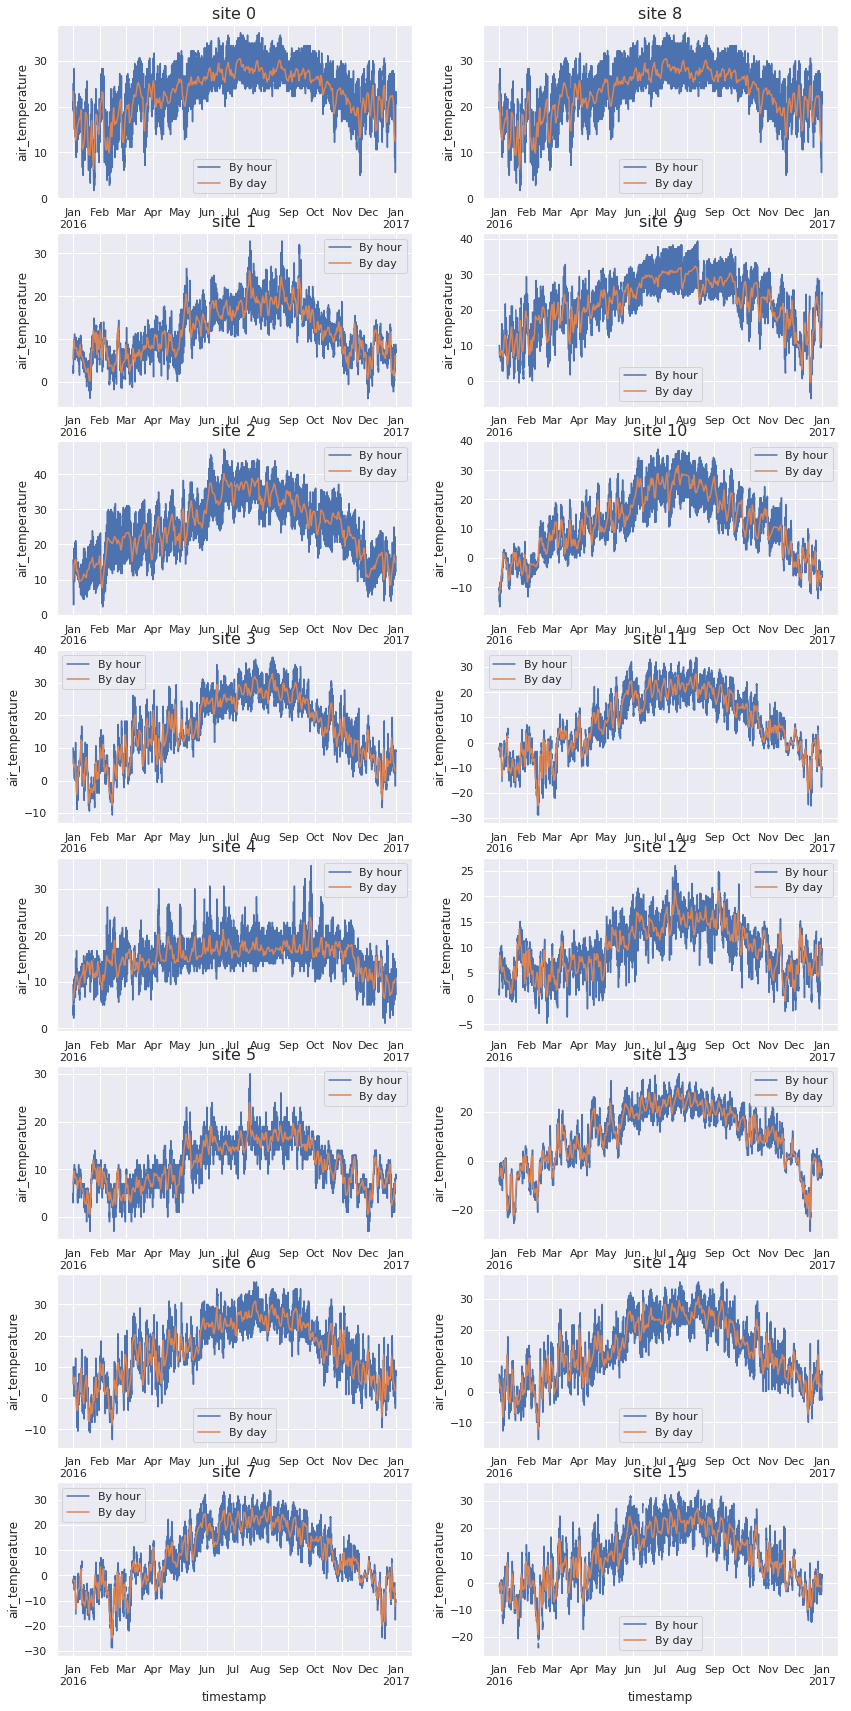

In [15]:

fig,axes = plt.subplots(8,2,figsize=(14,30))
for i in (weather_train['site_id'].unique()):
    weather_train[weather_train['site_id'] == i][['timestamp','air_temperature']].set_index('timestamp')\
    .resample('H').mean()['air_temperature'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('air_temperature')
    weather_train[weather_train['site_id'] == i][['timestamp','air_temperature']].set_index('timestamp')\
    .resample('D').mean()['air_temperature'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('air_temperature')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()

In [16]:
without_air_tmp = weather_train[weather_train['air_temperature'].isna()]

In [17]:
display(without_air_tmp.head())

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
368,0,2016-01-16 08:00:00,NaN,NaN,NaN,0.0,NaN,180.0,1.5
369,0,2016-01-16 09:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.5
370,0,2016-01-16 10:00:00,NaN,2.0,NaN,0.0,NaN,190.0,1.5
15763,1,2016-10-18 13:00:00,NaN,NaN,NaN,NaN,NaN,290.0,6.2
22349,2,2016-07-19 02:00:00,NaN,NaN,NaN,86.0,NaN,NaN,NaN


In [ ]:
## cloud_coverage
## site_id 7,11没有记录,其他点缺失值也比较多

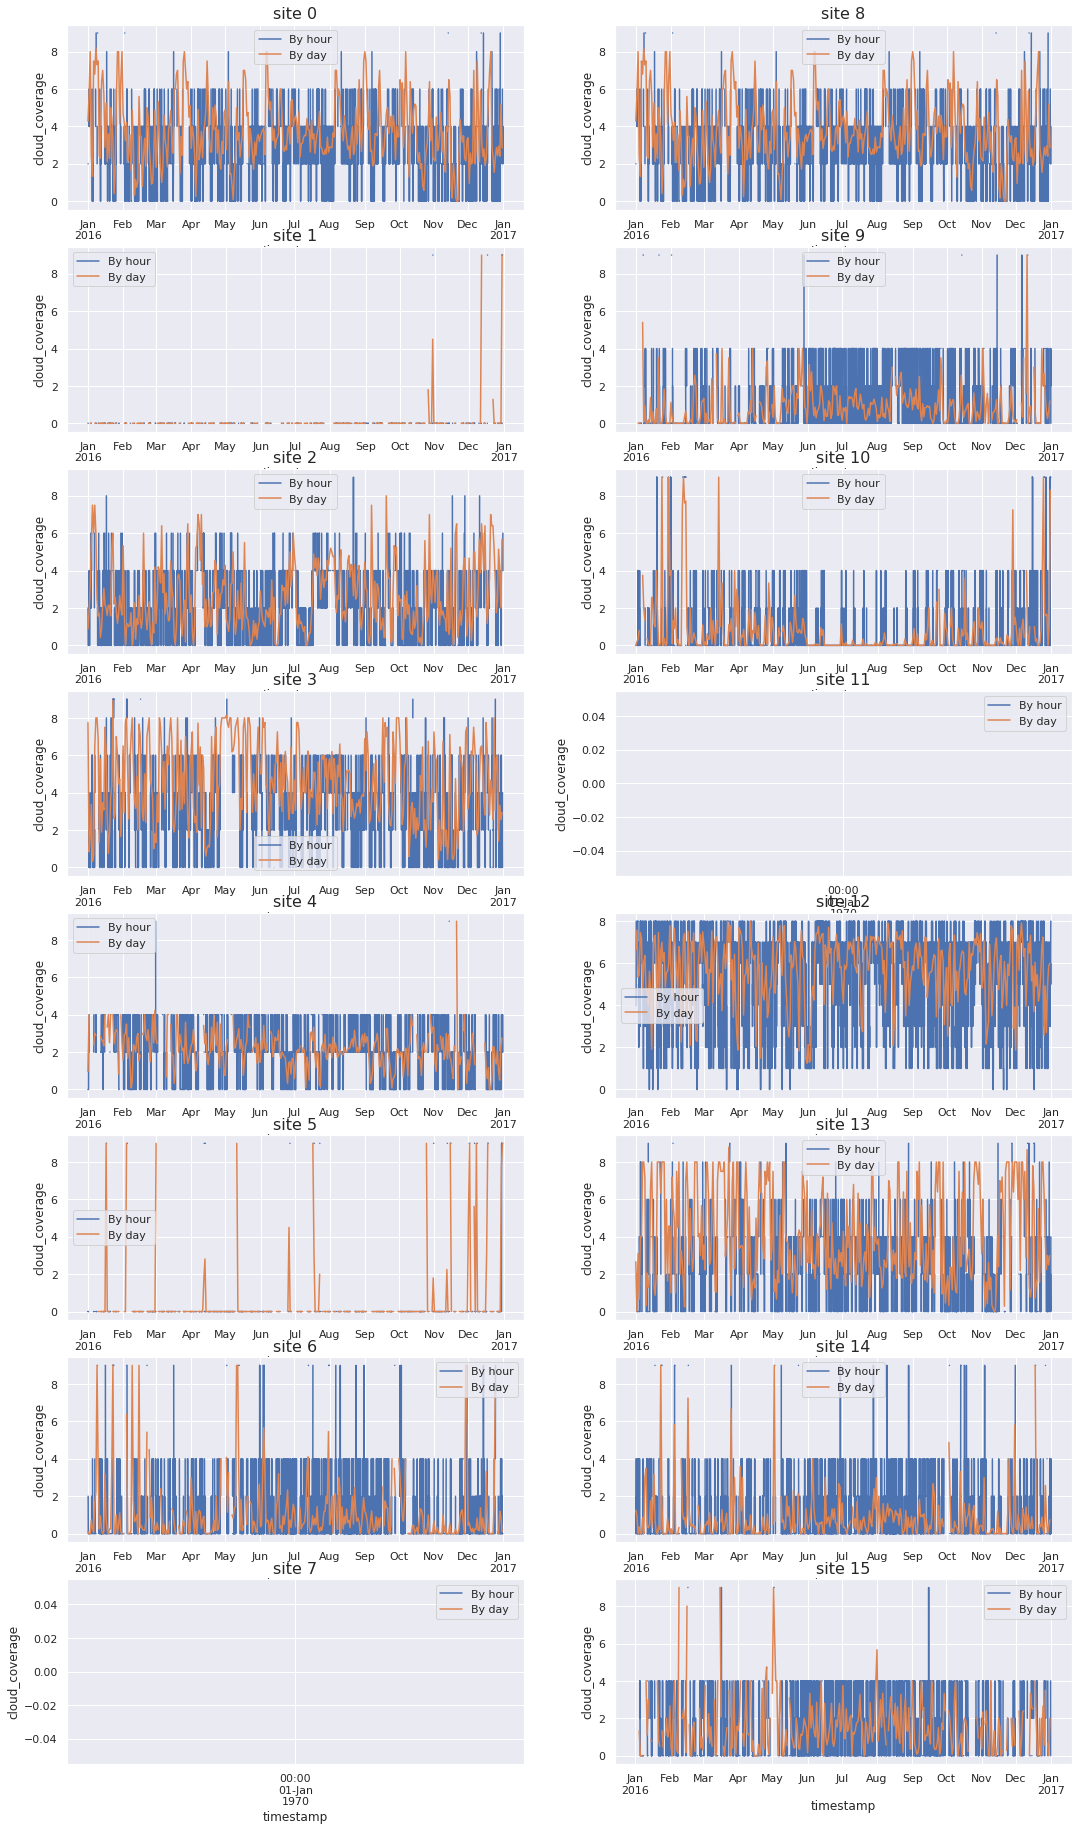

In [23]:
fig,axes = plt.subplots(8,2,figsize=(18,32))
for i in (weather_train['site_id'].unique()):
    weather_train[weather_train['site_id'] == i][['timestamp','cloud_coverage']].set_index('timestamp')\
    .resample('H').mean()['cloud_coverage'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('cloud_coverage')
    weather_train[weather_train['site_id'] == i][['timestamp','cloud_coverage']].set_index('timestamp')\
    .resample('D').mean()['cloud_coverage'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('cloud_coverage')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()fig,axes = plt.subplots(8,2,figsize=(18,32))
for i in (weather_train['site_id'].unique()):
    weather_train[weather_train['site_id'] == i][['timestamp','cloud_coverage']].set_index('timestamp')\
    .resample('H').mean()['cloud_coverage'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('cloud_coverage')
    weather_train[weather_train['site_id'] == i][['timestamp','cloud_coverage']].set_index('timestamp')\
    .resample('D').mean()['cloud_coverage'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('cloud_coverage')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()

In [33]:
for i in (weather_train['site_id'].unique()):
    cur_train = weather_train[weather_train['cloud_coverage'].isna() & (weather_train['site_id']==i) ]
    print('site:',i,len(cur_train),len(weather_train[weather_train['site_id']==i]))
    #display(cur_train.head())
    

site: 0 3830 8784
site: 1 7062 8763
site: 2 2354 8783
site: 3 3642 8780
site: 4 4230 8783
site: 5 6030 8755
site: 6 2992 8782
site: 7 8614 8614
site: 8 3830 8784
site: 9 3458 8780
site: 10 2450 8782
site: 11 8614 8614
site: 12 59 8755
site: 13 4298 8783
site: 14 3311 8777
site: 15 4399 8454


In [ ]:
## dew_temperature
## 有113个缺失值，同样可以用一些方法进行处理

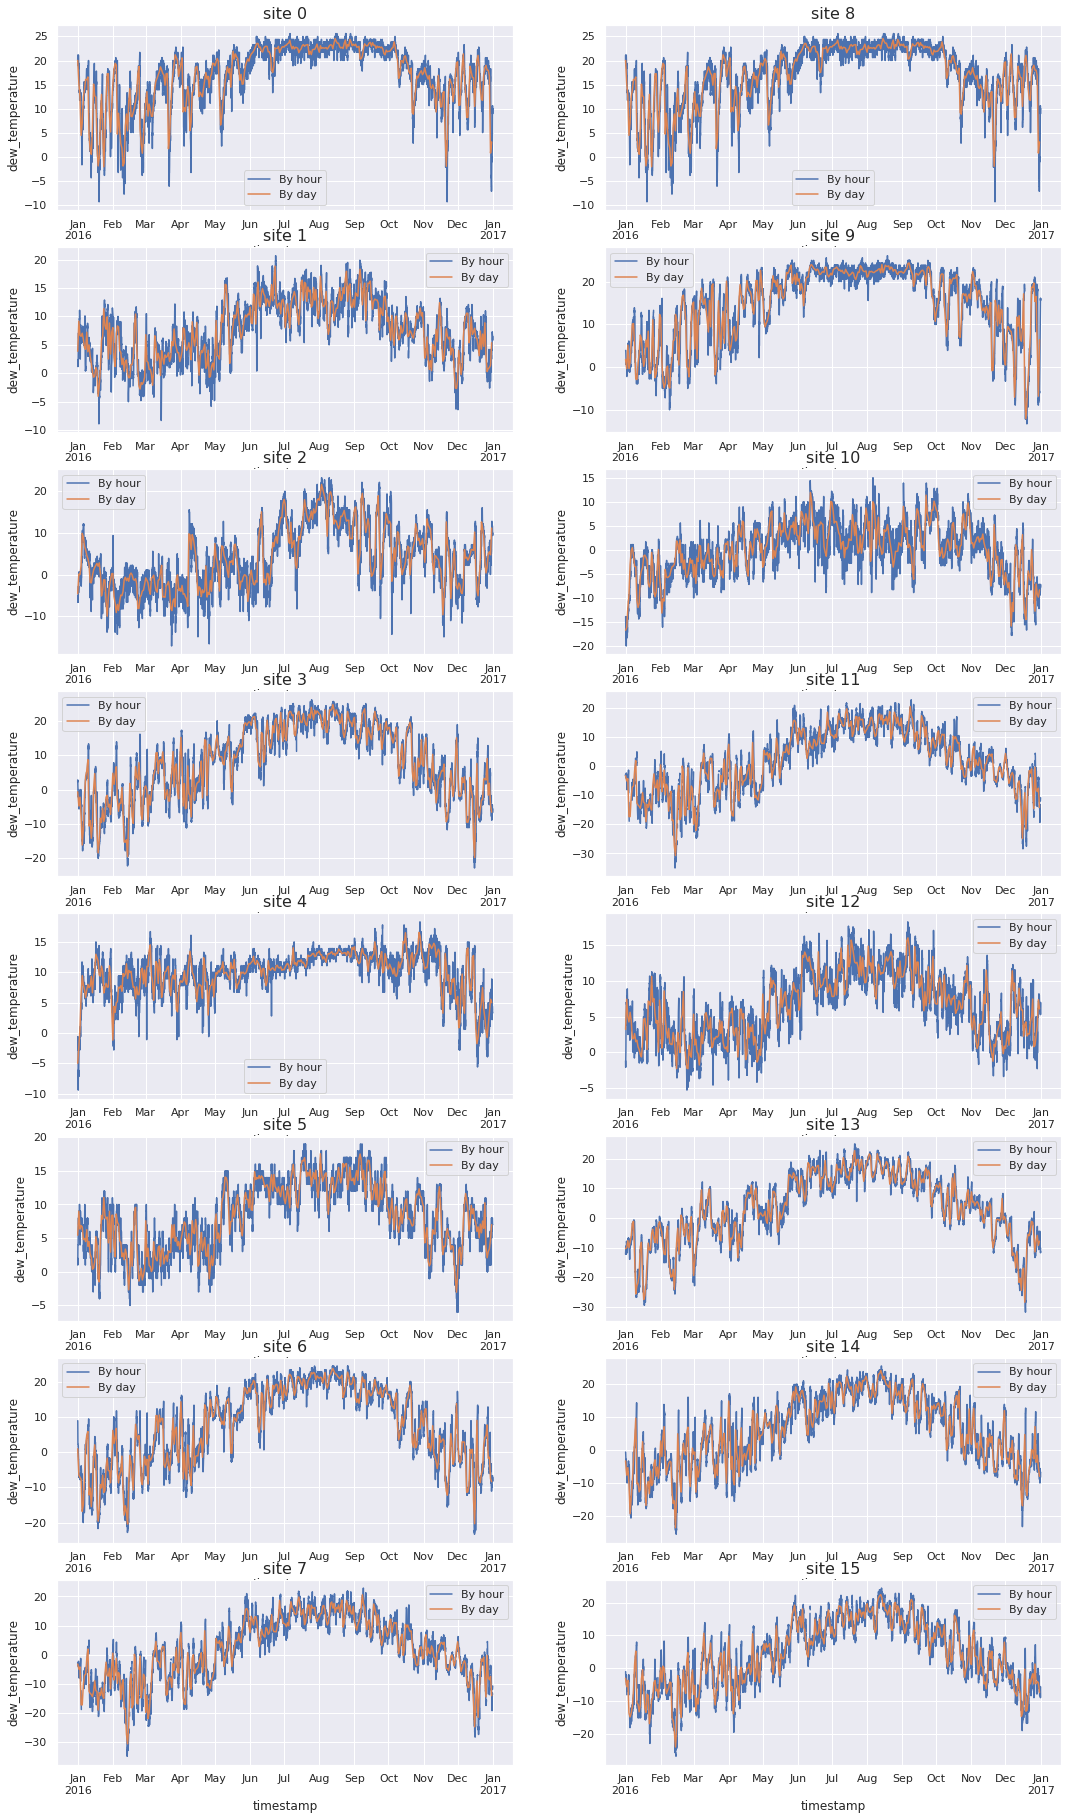

In [34]:
fig,axes = plt.subplots(8,2,figsize=(18,32))
for i in (weather_train['site_id'].unique()):
    weather_train[weather_train['site_id'] == i][['timestamp','dew_temperature']].set_index('timestamp')\
    .resample('H').mean()['dew_temperature'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('dew_temperature')
    weather_train[weather_train['site_id'] == i][['timestamp','dew_temperature']].set_index('timestamp')\
    .resample('D').mean()['dew_temperature'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('dew_temperature')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()

In [ ]:
##precip_depth_1_hr
## 较多缺失值

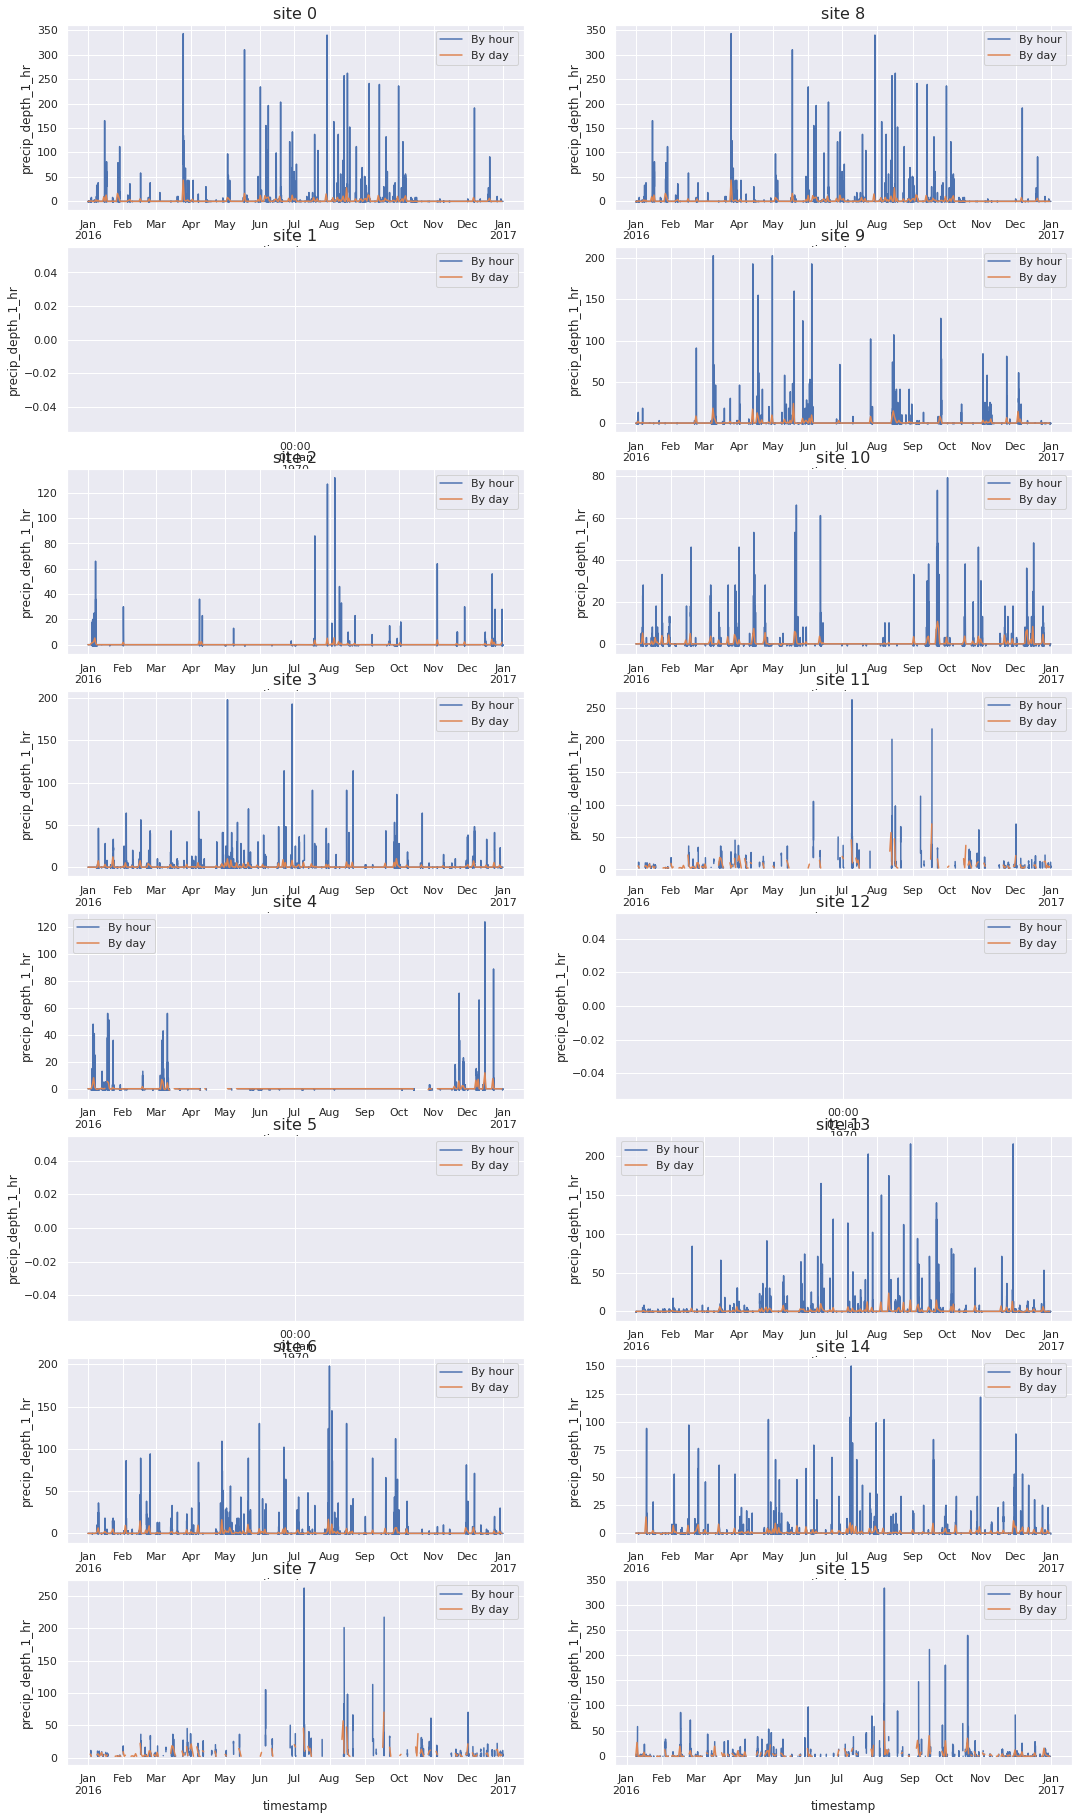

In [35]:
fig,axes = plt.subplots(8,2,figsize=(18,32))
for i in (weather_train['site_id'].unique()):
    weather_train[weather_train['site_id'] == i][['timestamp','precip_depth_1_hr']].set_index('timestamp')\
    .resample('H').mean()['precip_depth_1_hr'].plot(ax=axes[i%8][i//8],label='By hour').set_ylabel('precip_depth_1_hr')
    weather_train[weather_train['site_id'] == i][['timestamp','precip_depth_1_hr']].set_index('timestamp')\
    .resample('D').mean()['precip_depth_1_hr'].plot(ax=axes[i%8][i//8],label='By day').set_ylabel('precip_depth_1_hr')
    axes[i%8][i//8].set_title('site {}'.format(i), fontsize=16);
    axes[i%8][i//8].legend()